In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/Users/rishismac/ML_Project/notebook/data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [20]:
cols=data.columns
data[cols[-1]].dtype=='O'

False

In [26]:
num_variables=[feature for feature in list(data.columns) if data[feature].dtype!='O']
cat_variables=[feature for feature in list(data.columns) if data[feature].dtype=='O']


['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [90]:
num_variables
cat_variables

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [27]:
data['total score']=data['math score']+data['reading score']+data['writing score']

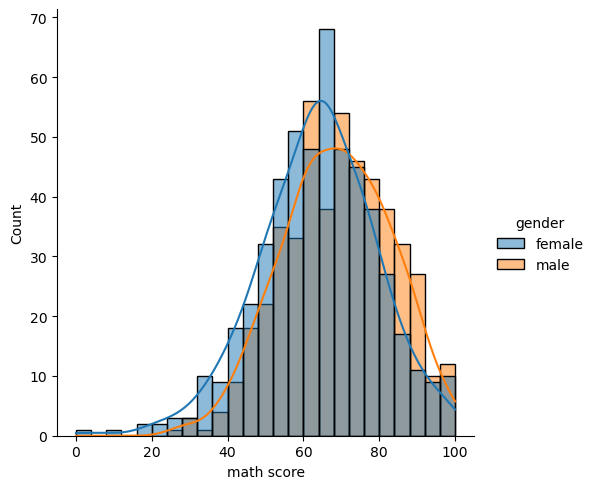

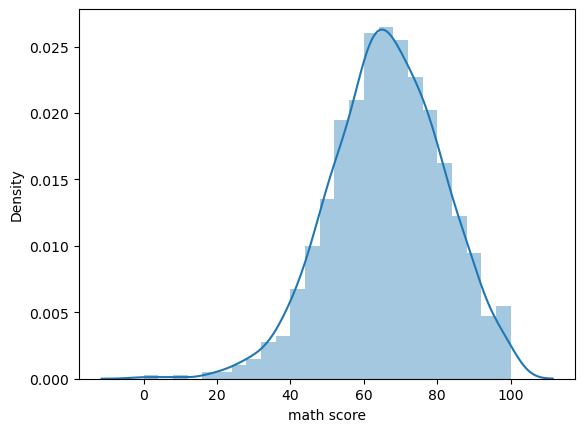

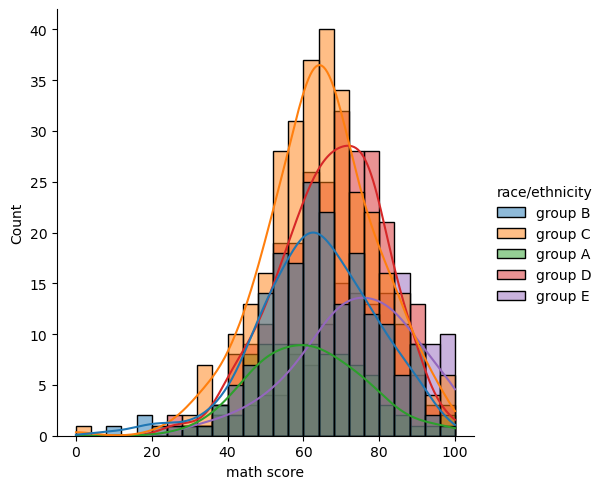

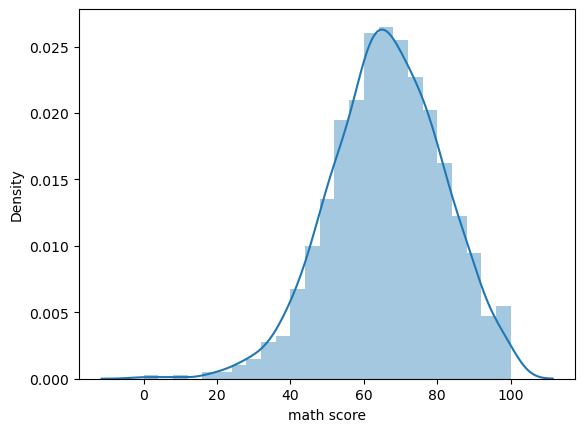

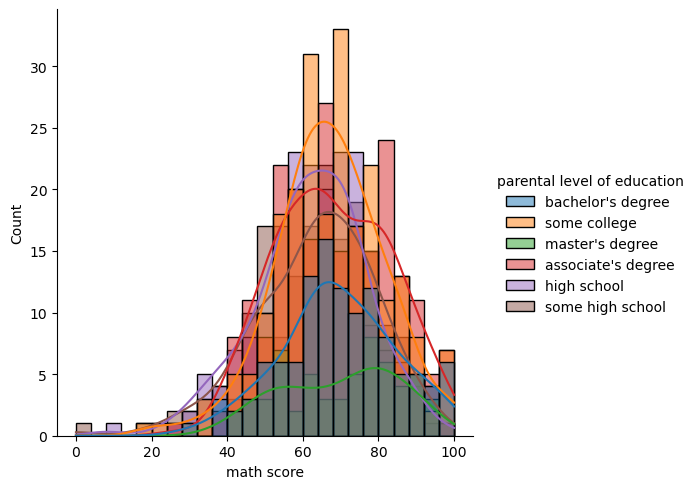

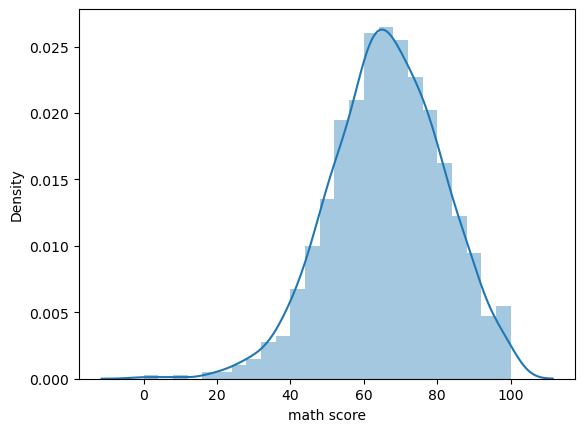

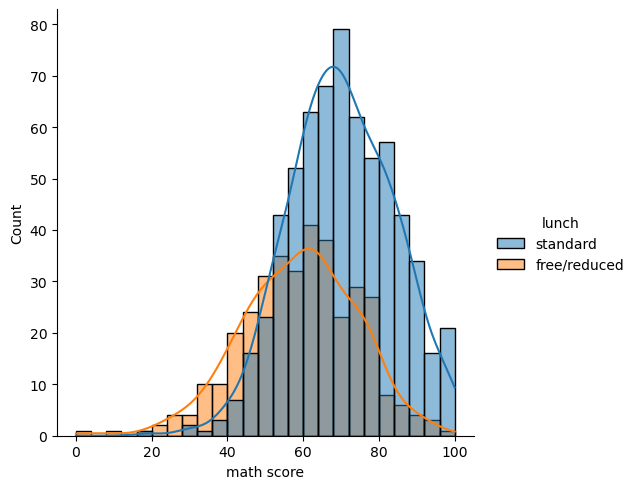

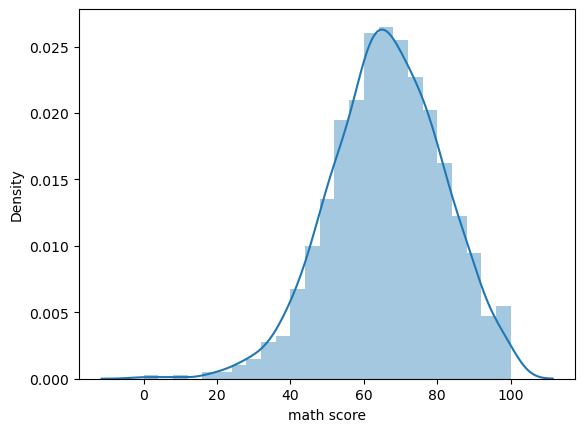

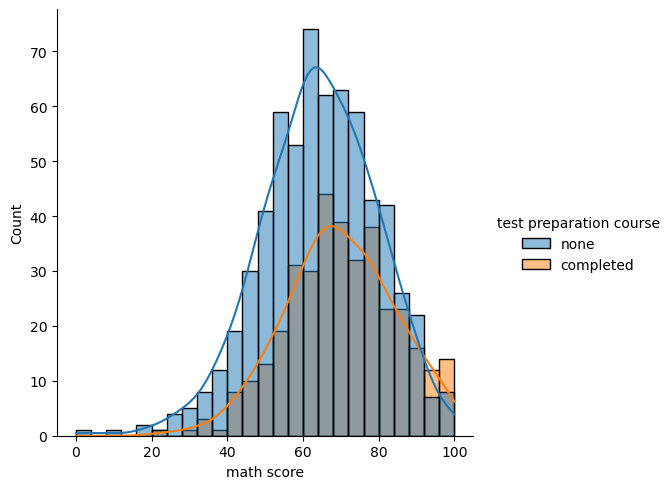

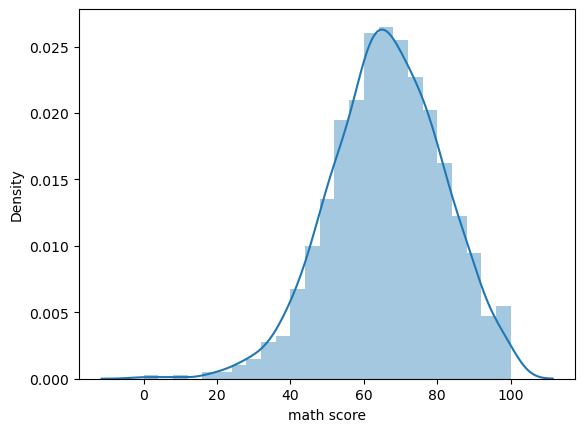

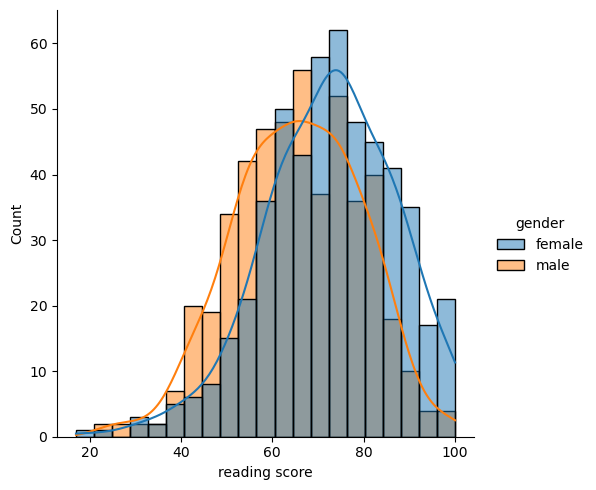

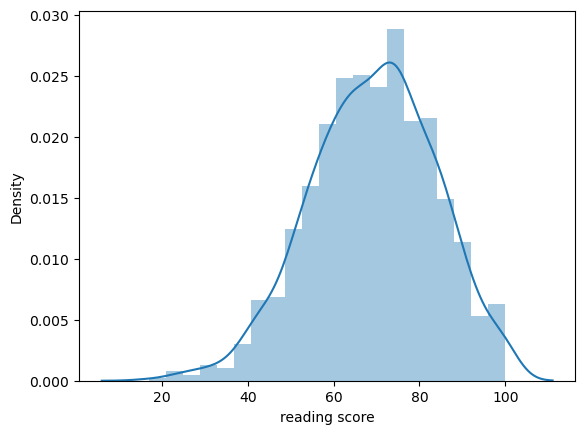

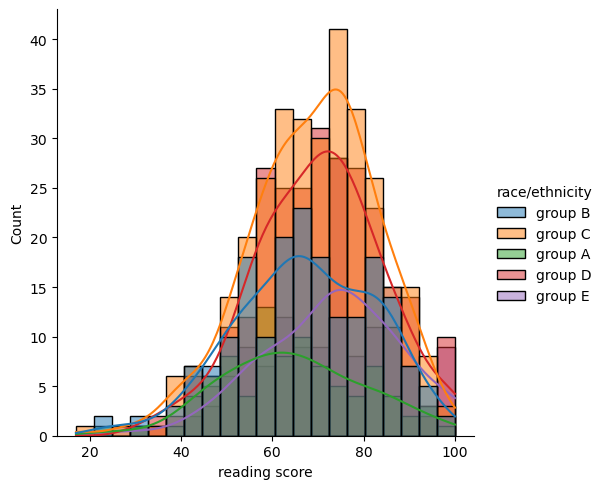

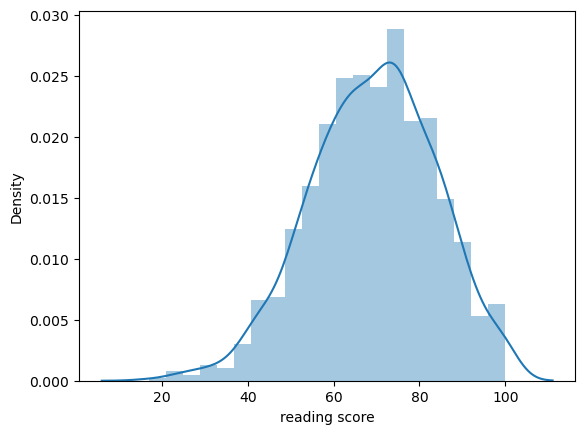

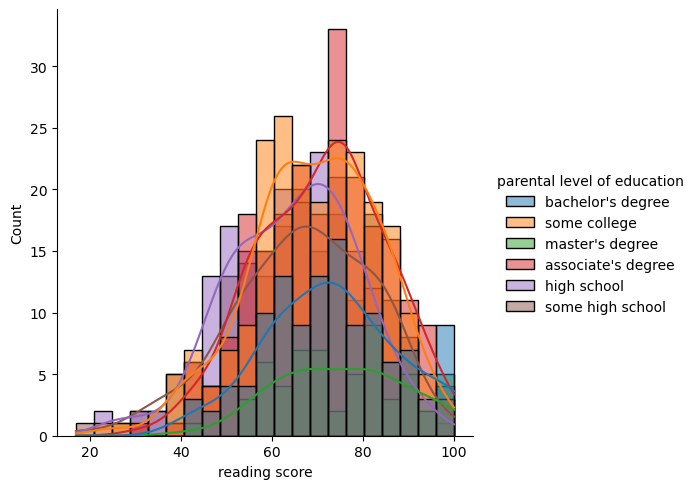

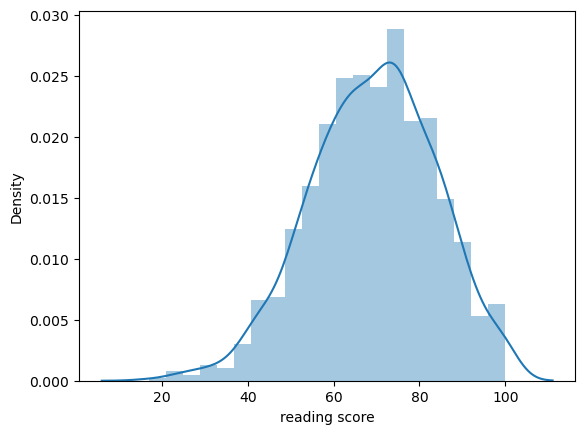

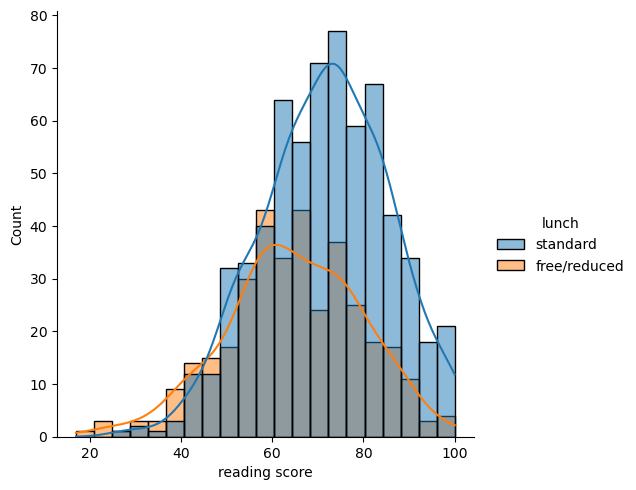

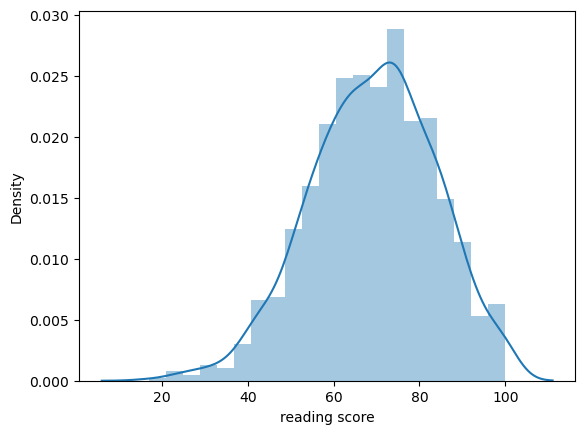

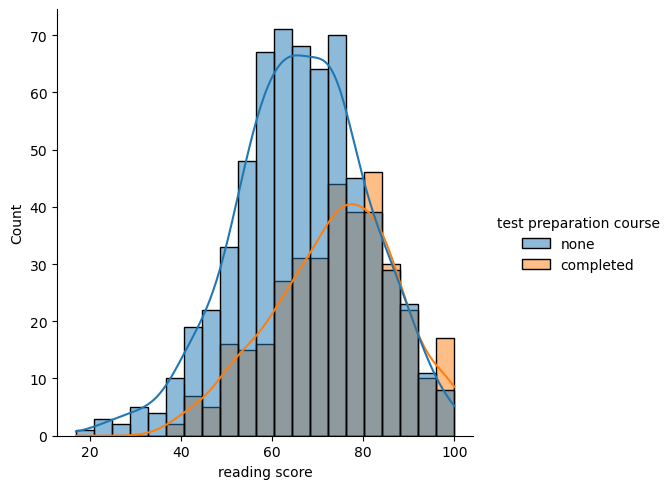

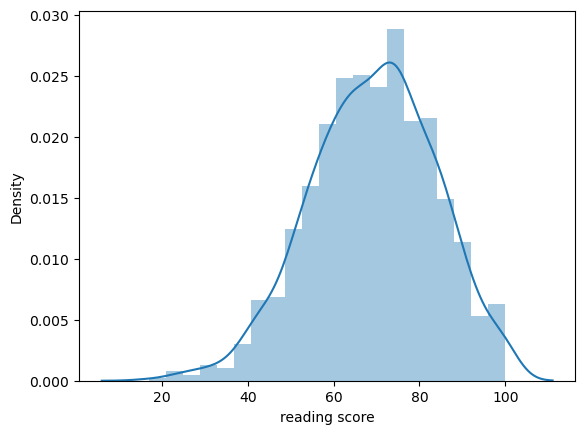

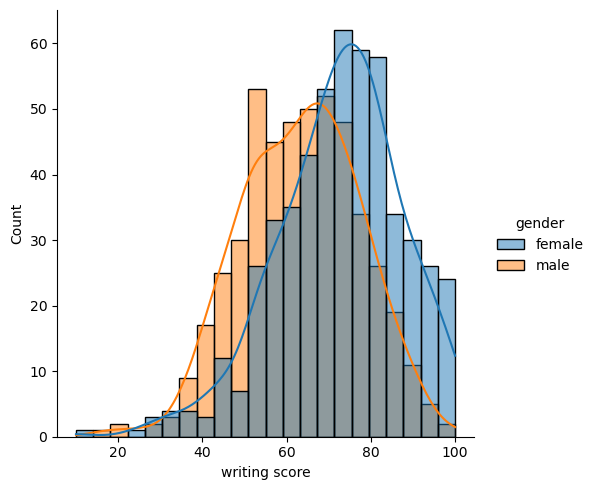

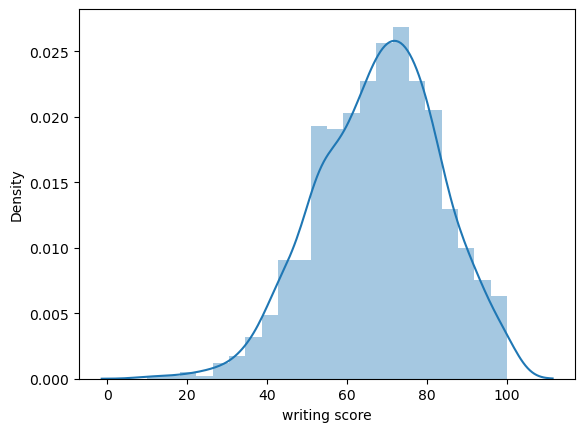

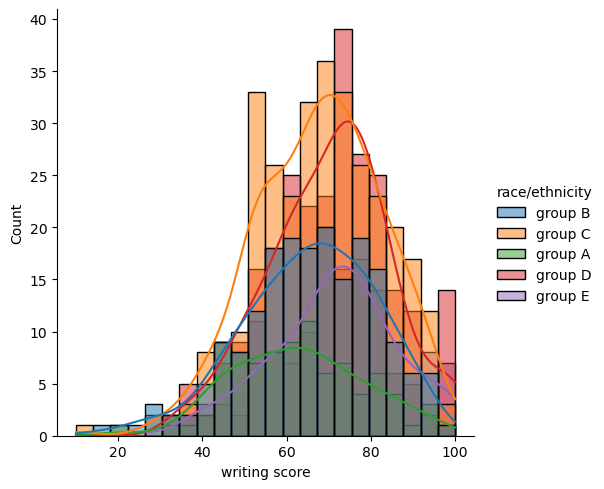

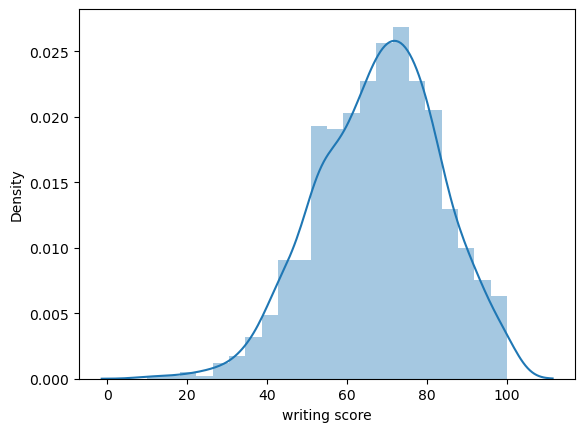

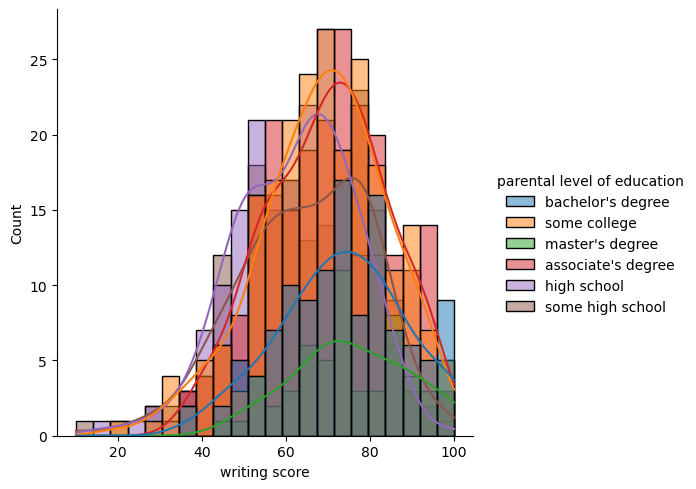

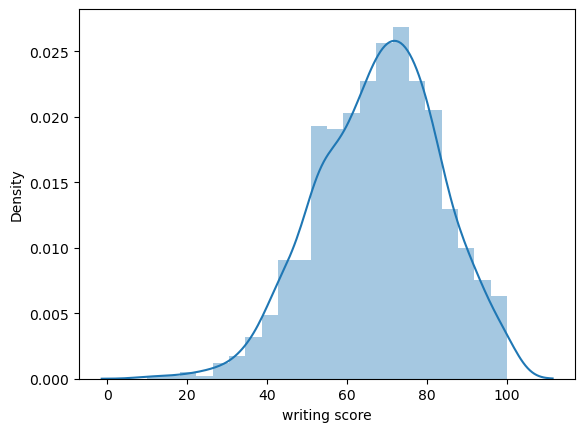

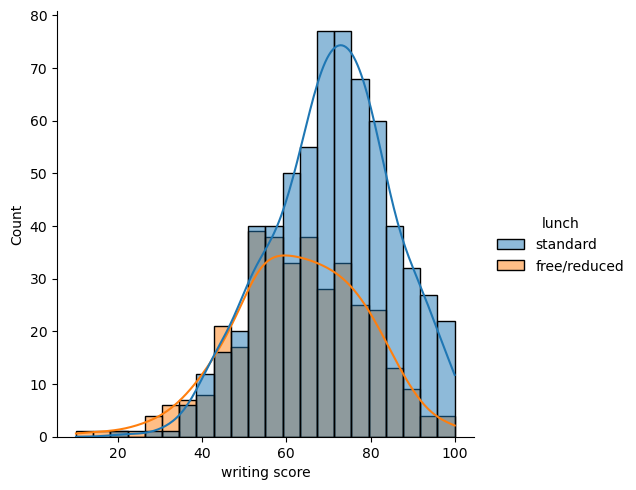

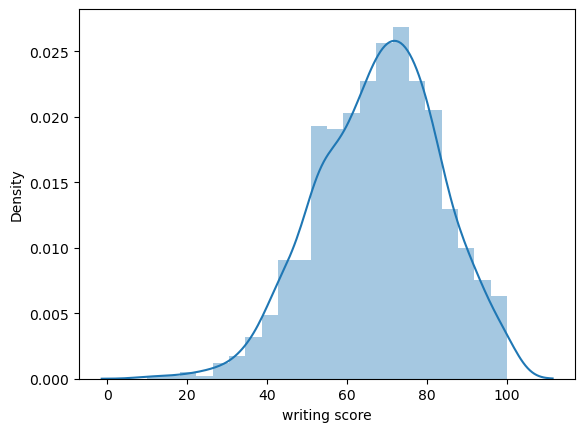

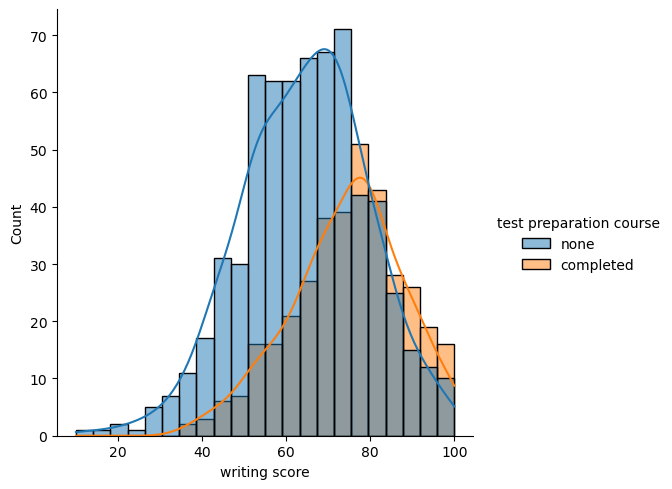

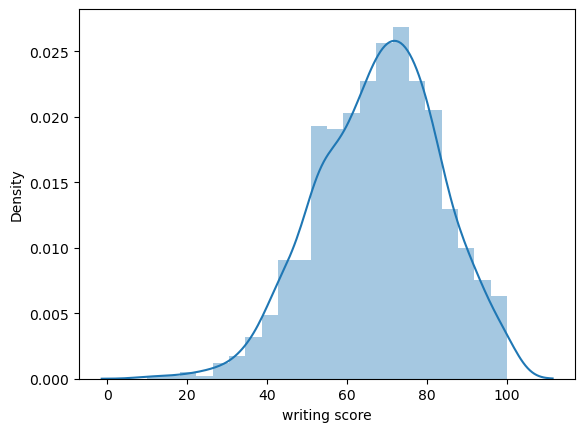

In [43]:
for i in num_variables:
    for j in cat_variables:
        
        sns.displot(data=data,x=data[i],hue=j,kde=True)
        plt.show()
        sns.distplot(data[i])
        plt.show()


In [50]:
for i in cat_variables:
    print('The variable  "',i,'"  has ',data[i].nunique(),' values which are: ',data[i].unique())

The variable  " gender "  has  2  values which are:  ['female' 'male']
The variable  " race/ethnicity "  has  5  values which are:  ['group B' 'group C' 'group A' 'group D' 'group E']
The variable  " parental level of education "  has  6  values which are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The variable  " lunch "  has  2  values which are:  ['standard' 'free/reduced']
The variable  " test preparation course "  has  2  values which are:  ['none' 'completed']


In [71]:
dummy=pd.get_dummies(data[cat_variables],dtype=float,drop_first=True)
data_transformed=pd.concat([data,dummy],axis=1)


In [72]:
data_transformed=data_transformed.drop(cat_variables,axis=1)

In [73]:
data_transformed

,math score,reading score,writing score,total score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,69,90,88,247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,90,95,93,278,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,47,57,44,148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,76,78,75,229,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,282,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,62,55,55,172,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
997,59,71,65,195,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,68,78,77,223,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [51]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

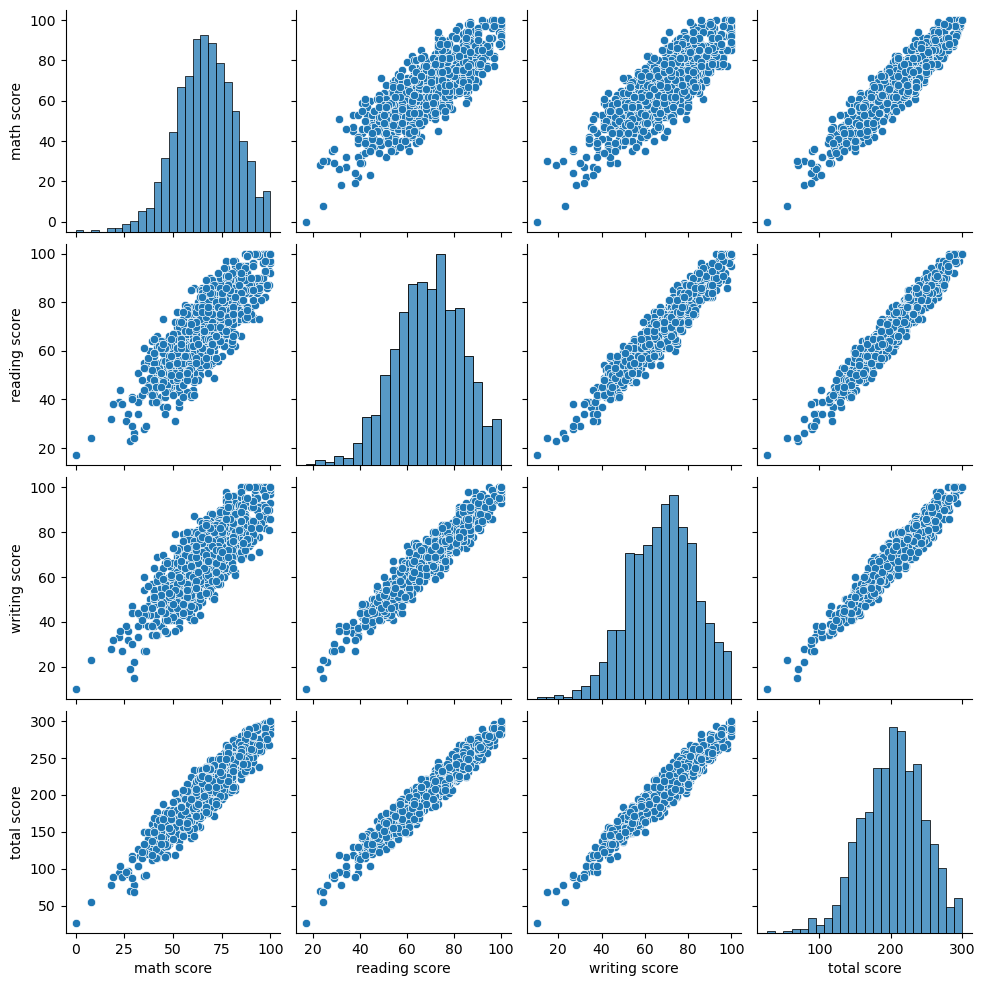

In [74]:
sns.pairplot(data)


<Axes: >

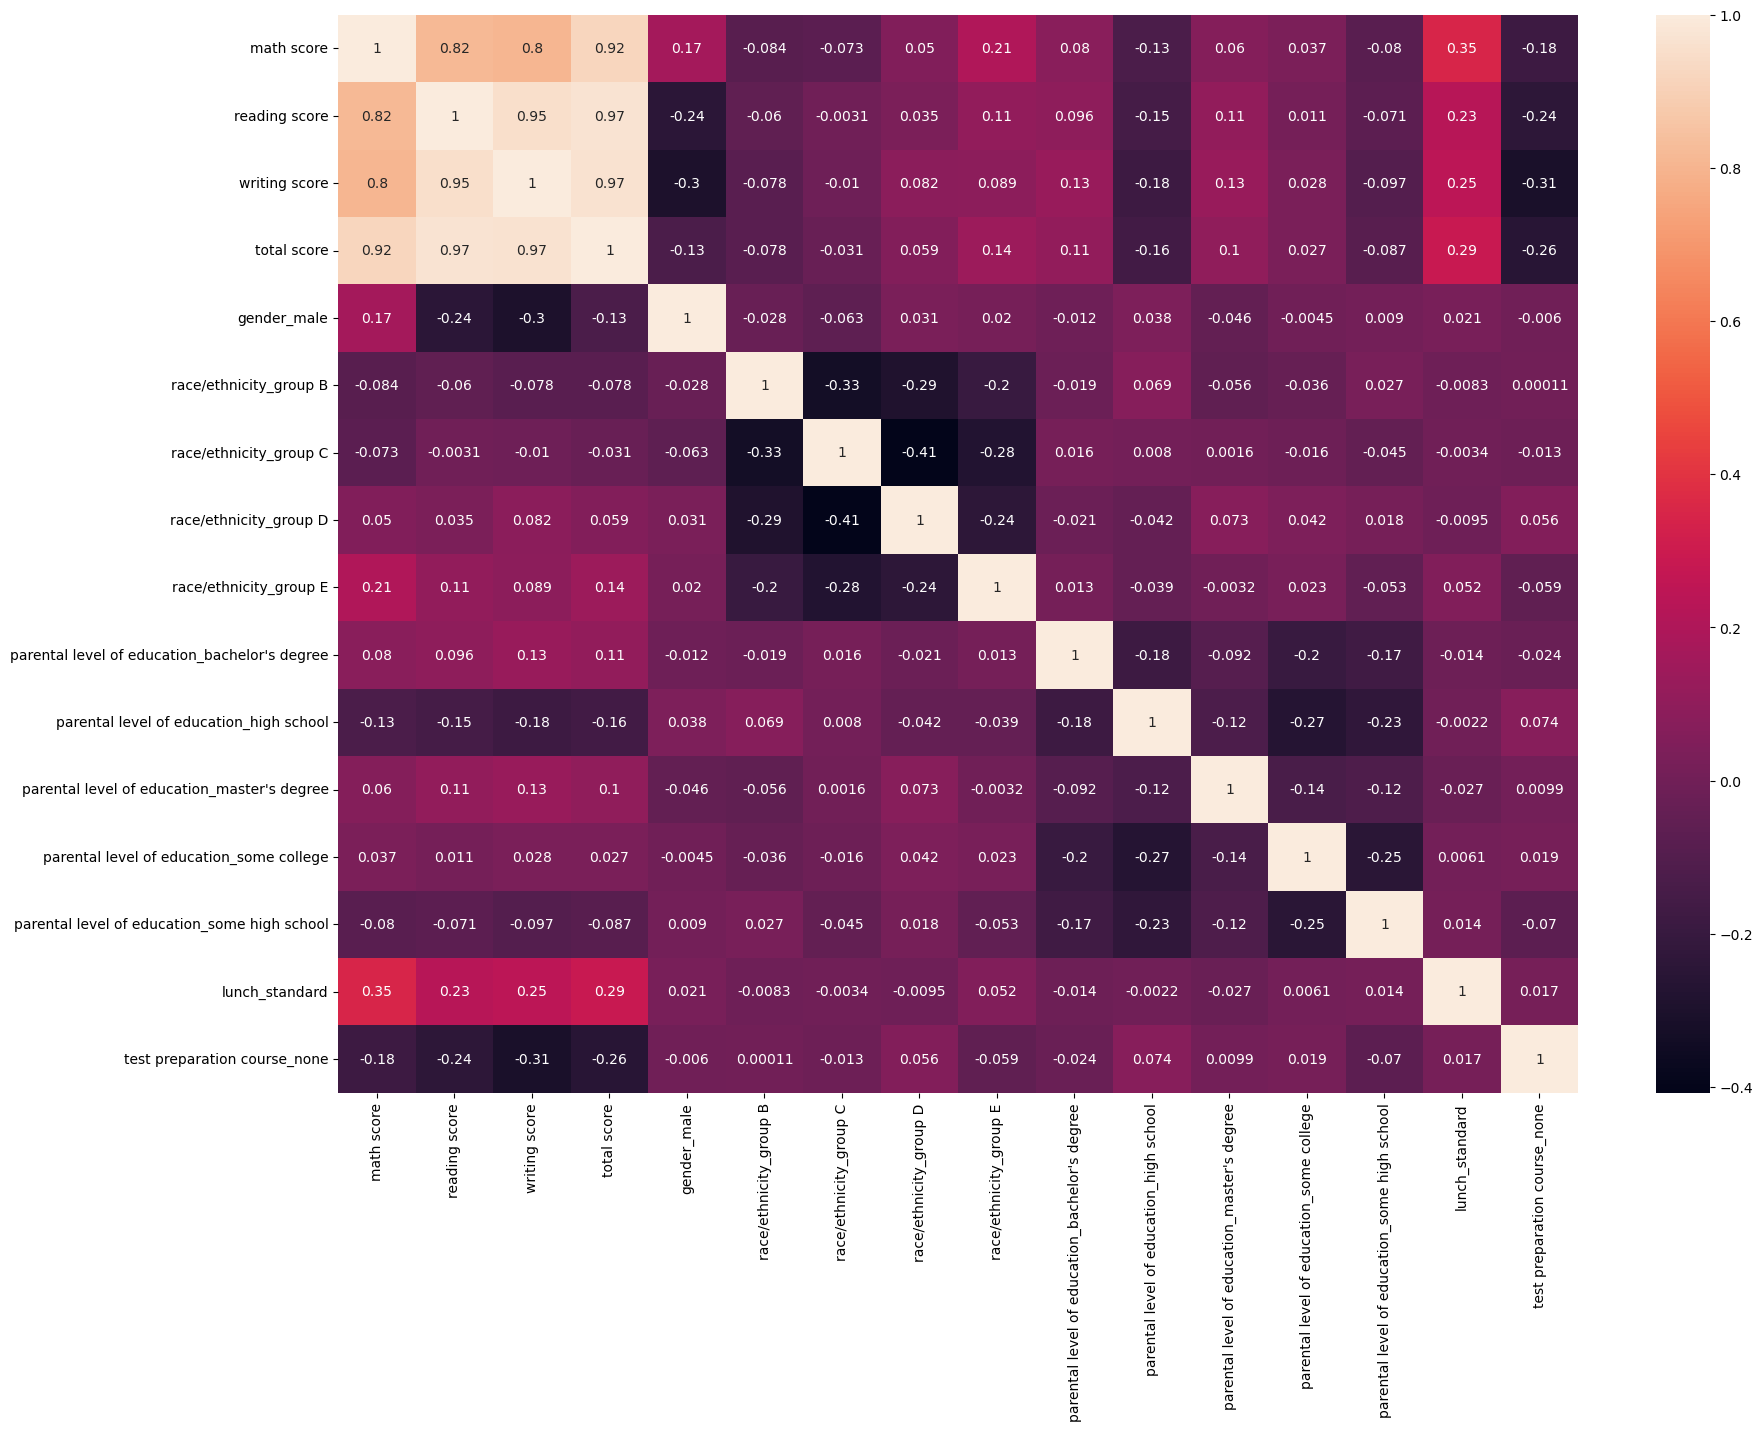

In [88]:
plt.figure(figsize=(20,14))
sns.heatmap(data_transformed.corr(),annot=True)